In [1]:
import requests
import pandas as pd
import torch.optim as optim
import numpy as np
DATA=[]


In [2]:
for i in range(27,32):
  url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-'+str(i)+'-2020.csv'
  res = requests.get(url, allow_redirects=True)
  with open('covid.csv','wb') as file:
     file.write(res.content)
  DATA.append(pd.read_csv('covid.csv'))

In [3]:
for i in range(1,30):
  url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/02-'+str(i)+'-2020.csv'
  res = requests.get(url, allow_redirects=True)
  with open('covid.csv','wb') as file:
     file.write(res.content)
  DATA.append(pd.read_csv('covid.csv'))

In [4]:
for i in range(1,32):
  url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-'+str(i)+'-2020.csv'
  res = requests.get(url, allow_redirects=True)
  with open('covid.csv','wb') as file:
     file.write(res.content)
  DATA.append(pd.read_csv('covid.csv'))

In [5]:
for i in range(1,31):
  url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-'+str(i)+'-2020.csv'
  res = requests.get(url, allow_redirects=True)
  with open('covid.csv','wb') as file:
     file.write(res.content)
  DATA.append(pd.read_csv('covid.csv'))

In [6]:
for i in range(1,32):
  url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-'+str(i)+'-2020.csv'
  res = requests.get(url, allow_redirects=True)
  with open('covid.csv','wb') as file:
     file.write(res.content)
  DATA.append(pd.read_csv('covid.csv'))

In [7]:
for i in range(1,31):
  url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-'+str(i)+'-2020.csv'
  res = requests.get(url, allow_redirects=True)
  with open('covid.csv','wb') as file:
     file.write(res.content)
  DATA.append(pd.read_csv('covid.csv'))

In [8]:
for i in range(1,32):
  url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-'+str(i)+'-2020.csv'
  res = requests.get(url, allow_redirects=True)
  with open('covid.csv','wb') as file:
     file.write(res.content)
  DATA.append(pd.read_csv('covid.csv'))

In [9]:
for i in range(1,32):
  url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/08-'+str(i)+'-2020.csv'
  res = requests.get(url, allow_redirects=True)
  with open('covid.csv','wb') as file:
     file.write(res.content)
  DATA.append(pd.read_csv('covid.csv'))

In [10]:
for i in range(1,14):
  url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/09-'+str(i)+'-2020.csv'
  res = requests.get(url, allow_redirects=True)
  with open('covid.csv','wb') as file:
     file.write(res.content)
  DATA.append(pd.read_csv('covid.csv'))

In [142]:
Data_Germany=[]
for i in range(len(DATA)):
  if 'Country/Region' in DATA[i] :
    fliter = (DATA[i]['Country/Region']=='US')
    if len(DATA[i][fliter])>0:
      Data_Germany.append(DATA[i][fliter])
  elif 'Country_Region' in DATA[i] :
    fliter = (DATA[i]['Country_Region']=='US')
    if len(DATA[i][fliter])>0:
      Data_Germany.append(DATA[i][fliter])

In [103]:
len(Data_Germany)
Data_Germany[100]

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
3113,NaN,NaN,Australian Capital Territory,Australia,2020-06-21 04:33:19,-35.4735,149.0124,108,3,105,0,"Australian Capital Territory, Australia",25.227751,2.777778
3374,NaN,NaN,New South Wales,Australia,2020-06-21 04:33:19,-33.8688,151.2093,3149,48,2771,330,"New South Wales, Australia",38.790342,1.524293
3386,NaN,NaN,Northern Territory,Australia,2020-06-21 04:33:19,-12.4634,130.8456,29,0,29,0,"Northern Territory, Australia",11.807818,0.000000
3435,NaN,NaN,Queensland,Australia,2020-06-21 04:33:19,-27.4698,153.0251,1066,6,1053,7,"Queensland, Australia",20.838628,0.562852
3493,NaN,NaN,South Australia,Australia,2020-06-21 04:33:19,-34.9285,138.6007,440,4,436,0,"South Australia, Australia",25.049815,0.909091
3506,NaN,NaN,Tasmania,Australia,2020-06-21 04:33:19,-42.8821,147.3272,228,13,215,0,"Tasmania, Australia",42.577031,5.701754
3557,NaN,NaN,Victoria,Australia,2020-06-21 04:33:19,-37.8136,144.9631,1836,19,1694,123,"Victoria, Australia",27.692725,1.034858
3568,NaN,NaN,Western Australia,Australia,2020-06-21 04:33:19,-31.9505,115.8605,605,9,593,3,"Western Australia, Australia",22.998555,1.487603


In [143]:
population_N=327.2*1000000


In [144]:
St=[]
for i in range(len(Data_Germany)):
  St.append(Data_Germany[i]['Confirmed'].sum())
St=np.array(St)

In [145]:
It=[]
for i in range(len(Data_Germany)):
  It.append(Data_Germany[i]['Confirmed'].sum()-Data_Germany[i]['Deaths'].sum()-Data_Germany[i]['Recovered'].sum())
It=np.array(It)

In [146]:
Rt=[]
for i in range(len(Data_Germany)):
  Rt.append(Data_Germany[i]['Recovered'].sum())
Rt=np.array(Rt)

In [147]:
Dt=[]
for i in range(len(Data_Germany)):
  Dt.append(Data_Germany[i]['Deaths'].sum())
Dt=np.array(Dt)

In [148]:
import numpy as np
from scipy.optimize import minimize

def objective(x):
  dt=1
  beta=x[0]
  gamma=x[1]
  mu=x[2]
  St_pred=St*(1-dt*beta*It/population_N)
  It_pred=It*(1+dt*(beta*St/population_N)-dt*(mu+gamma))
  Rt_pred=Rt+(dt*gamma*It)
  Dt_pred=Dt+(dt*mu*It)
  #((St[1:len(St)]-St_pred[0:len(St_pred)-1])**2).sum()+
  #+((Rt[1:len(Rt)]-Rt_pred[0:len(Rt_pred)-1])**2).sum()
  loss=0.01*np.log(np.max(It))/np.max(It)*((It[1:len(It)]-It_pred[0:len(It_pred)-1])**2).sum()+((np.log(It[1:len(It)]+0.0000001)-np.log(It_pred[0:len(It_pred)-1]+0.000001))**2).sum()+0.01*np.log(np.max(It))/np.max(It)*((Dt[1:len(Dt)]-Dt_pred[0:len(Dt_pred)-1])**2).sum()+((np.log(Dt[1:len(Dt)]+0.0000001)-np.log(Dt_pred[0:len(Dt_pred)-1]+0.0000001))**2).sum()
  return loss


In [150]:

# initial guesses
beta = 0.5
gamma = 0.5
mu = 0.5
population_N
n = 3
x0 = np.zeros(n)
x0[0] = beta
x0[1] = gamma
x0[2] = mu
b = (0.0,1.0)
bnds = (b, b, b)

In [151]:
Sol=minimize(objective,x0,bounds=bnds)#,bounds=bnds

In [152]:
Sol

      fun: 12908.707482921827
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.39951914e+03, -2.66257548e+04,  7.59707043e+08])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 216
      nit: 7
   status: 0
  success: True
        x: array([9.99999251e-01, 1.48961182e-06, 8.02113363e-09])

In [153]:
objective(Sol.x)

12908.707482921827

In [154]:
beta=Sol.x[0]
gamma=Sol.x[1]
mu=Sol.x[2]
dt=1

St_pred=St*(1-dt*beta*It/population_N)

It_pred=It*(1+dt*(beta*St/population_N)-(mu+gamma))

Rt_pred=Rt+(dt*gamma*It)

Dt_pred=Dt+(dt*mu*It)


Text(0.5, 1.0, 'Death')

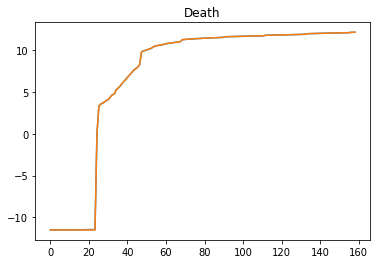

In [155]:
import matplotlib.pyplot as plt
dat=np.linspace(0,len(Dt_pred)-1,len(Dt_pred)-1)
plt.plot(dat,np.log(Dt_pred[0:len(Dt_pred)-1]+0.00001))
plt.plot(dat,np.log(Dt[0:len(Dt)-1]+0.00001))
plt.title('Death')

Text(0.5, 1.0, 'I')

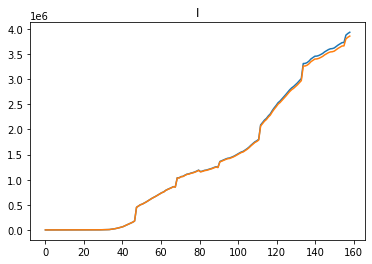

In [156]:
dat=np.linspace(0,len(It_pred)-1,len(It_pred)-1)
plt.plot(dat,It_pred[0:len(It_pred)-1])
plt.plot(dat,It[0:len(It)-1])
plt.title('I')

Text(0.5, 1.0, 'S')

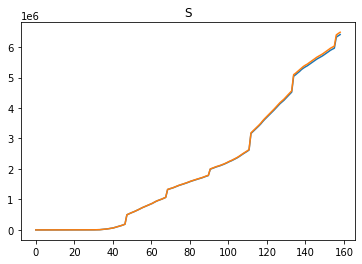

In [157]:
dat=np.linspace(0,len(St_pred)-1,len(St_pred)-1)
plt.plot(dat,St_pred[0:len(St_pred)-1])
plt.plot(dat,St[0:len(St)-1])
plt.title('S')

Text(0.5, 1.0, 'R')

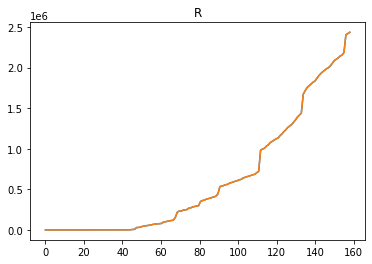

In [158]:
dat=np.linspace(0,len(Rt_pred)-1,len(Rt_pred)-1)
plt.plot(dat,Rt_pred[0:len(Rt_pred)-1])
plt.plot(dat,Rt[0:len(Rt)-1])
plt.title('R')